# <center> MSBA 6460: Advanced AI for Business Applications </center>
<center> Summer 2022, Mochen Yang </center>

## <center> Text Preprocessing and Representation Learning </center>

# Table of contents
1. [What is NLP?](#nlp_intro)
    - [Types of NLP Tasks and Their Applications](#nlp_application)
    - [Some Basic NLP Terminologies](#nlp_terminology)
1. [Why is NLP Challenging?](#challenge)
    - [Language is Complex](#lang_complex)
    - [Key Technical Challenges of NLP](#tech_challenge)
1. [Text Pre-processing](#preprocess)
1. [Bag-of-Words Representation](#bow)
    - [Binary, Frequency, and TF-IDF](#bow_methods)
    - [Implementation](#bow_implementation)
    - [Feature Selection](#bow_feature_selection)
    - [Exercise](#bow_exercise)
1. [Word Embeddings](#embedding)
    - [Basic Idea of Learning Word Embeddings](#embedding_idea)
    - [Learning Word Embeddings](#embedding_learning)
    - [Two Architectures: Skip-Gram and Continuous Bag-of-Words](#embedding_model)
    - [Implementation](#embedding_implementation)
1. [Additional Resources](#resource)

# What is Natural Language Processing (NLP)? <a name="nlp_intro"></a>

- Natural Language Processing (NLP) is one of the most important branches of machine learning and artificial intelligence. 
- The overarching goal of NLP is to **process and "understand" human languages**.
- It is often treated as "benchmark" for artificial intelligence (together with image recognition / computer vision). This is because we believe that the use of rich and structured languages in communications is a sign of strong intelligence. So, if we can teach machines how to use language to communicate, we have, in a sense, created artificial intelligence.
- I use the term NLP interchangeably with "text mining", "text analytics", "natural language understanding", etc. Their differences are not that important for our purposes.
- NLP is both simple and hard. It is simple because all of what you have learned about machine learning can be applied here. It is hard because, in my opinion, we are still a long way from fully solving NLP.

## Types of NLP Tasks and Their Applications <a name="nlp_application"></a>

There are a large number of common NLP tasks and applications. Here are some representative examples:
- **Sentiment analysis:** 
    - Based on content of a text, predict its sentiment (e.g., positive vs. negative). 
    - Applications: customer support, social media analytics, [stock market prediction](http://cs229.stanford.edu/proj2011/GoelMittal-StockMarketPredictionUsingTwitterSentimentAnalysis.pdf), ...
- **Topic modeling:**
    - Automatically discover prevalent topics from a collection of texts (typically in an unsupervised manner).
    - Applications: automated news curation, recommender systems, ...
- **Machine translation:**
    - Input texts in language A, output translated texts in language B. 
- **Question Answering:**
    - Input a question / query, output an answer in natural / human language.
    - Applications: conversational AI, Chat Bot, ...
- **Voice AI:**
    - Perform actions based on voice commands.
    - Application: Apple Siri, Google Assistant, Amazon Alexa, ...
- **(Futuristic) ["Jarvis"](https://en.wikipedia.org/wiki/J.A.R.V.I.S.):**
    - Does all of the above (and much more). An ultimate dream of NLP - an AI that understands you, communicates with you, and does what you request.

## Some Basic NLP Terminologies <a name="nlp_terminology"></a>

- **Document**: a piece of text which you are interested in analyzing.
    - E.g., an article, a tweet, a Facebook post
- **Corpus**: a collection of documents. This is your "dataset".
- **Word Token**: a single word.
- **Vocabulary**: the collection of all unique word tokens in a corpus.

# Why is NLP Challenging? <a name="challenge"></a>

## Language is Complex <a name="lang_complex"></a>

Language is so much more than just a string of texts. It is:
- Highly context-dependent. Different words do not necessarily imply different meanings, and the same word does not imply same meaning in all contexts.
    - Different words, same meaning: ill vs. sick;
    - Same word, different meanings: bear (the animal vs. the action);
    - Same word, related meanings: book (the physical book vs. the action of booking)
    - Think about all the puns
- Often ambiguous and subtle. 
    - ![image](images/ambiguity.jpg)
    - Think about the following two sentences:
        - "Margaret invited Susan for a visit, and she gave her a good lunch." Who gave who a good lunch?
        - "Margaret invited Susan for a visit, but she told her she had to go to work." Who had to go to work?
        - Understanding these sentences require knowledge of "social norm". Even humans are sometimes confused...
- Varying with different cultures.
    - Example: there is no concept of "verb tenses" in Chinese.
- Not always a straightforward representation of meaning / intent. Same sentence can mean different things when said in different ways.
    - **_He_** went to that store.
    - He **_went_** to that store.
    - He went to **_that_** store.
    - He went to that **_store_**.
- Often "noisy":
    - Contains misspellings, filler words, redundancies, etc.

## Key Technical Challenges of NLP <a name="tech_challenge"></a>

From a technical perspective, NLP is difficult mainly because of two reasons:
1. **Representation**: How to turn texts into numbers that capture meaningful information of the texts?
    - Representation learning is a constant theme in NLP and in machine learning in general. It is about how to best represent your data for the learning task;
    - This shouldn't be a completely new concept. You have seen it before outside the context of neural networks (think about SVM);
    - We will discuss two representation approaches in NLP: (1) the bag-of-words approach (captures existence/frequency but almost no semantic meaning) and (2) the embedding approach (captures _some_ semantic meaning).
2. **Modeling Technique/Architecture**: How to design appropriate modeling techniques that accommodate (and perhaps take advantage of) the unique properties of human language?
    - As an example, recurrent neural networks (discussed in a later lecture) are successful for NLP because it is _sequential_, which nicely captures the sequential nature of language;
    - The idea of mapping the modeling technique to the unique characteristics of the data goes beyond NLP. For example, think about convolutional neural nets (CNNs) and image recognition.

# Text Pre-processing <a name="preprocess"></a>

In many NLP tasks, before we generate numerical representations of texts, we would want to first perform some common pre-processing on it. Here, we will introduce a few common pre-processing steps and when to use them or not.

<font color="blue">It is important to realize: none of the pre-processing steps are "mandatory" or cannot be changed - whether and how to do them always depend on your specific machine learning task.</font>

Common text pre-processing steps:
1. **Tokenization**: break down each document into single word tokens.
    - When to use: when the unit of analysis for your task is words.
    - When not to use: when the unit of analysis is not words, but perhaps characters or sentences.
2. **Lower-casing**: transform each word to lower-case.
    - When to use: when casing does not provide important information to your task. Lower-casing reduces total number of unique tokens.
    - When not to use: when casing carries important information. E.g., capitalization of special abbreviations (think about name entity recognition).
3. **Punctuation removal**: remove punctuations.
    - When to use: when your task only cares about the actual words.
    - When not to use: when punctuation carries important information. E.g., the question mark in a question classification task.
3. **Stop-words removal**: remove "filler" words, such as "the", "a" in English.
    - When to use: when filler words do not carry actual meanings. Removing them again reduces the total number of unique tokens.
    - When not to use: when filler words carry important semantic meanings.
4. **Stemming**: reduce words to their semantic "roots". E.g., {"engineer", "engineering", "engineered"} $\Rightarrow$ "engine"
    - When to use: when your task only cares about word stems.
    - When not to use: when different forms of the same stem carry important information (usually the case).
    - In practice, we don't do stemming that often because it gets rid of important information.
5. **N-Gram generation**: generate phrases that contain N _consecutive_ words. E.g., 2-grams of the "welcome to my class" include "welcome to", "to my", and "my class".
    - When to use: when word phrases have important information beyond their constituent words. E.g., "customer service" together has more information than just "customer" + "service".
    - When not to use: be mindful that there can be a lot of N-grams! If they don't provide much additional value, adding them can drastically increase the number of features and make your algorithms much slower.

# Bag-of-Words Representation <a name="bow"></a>

Bag-of-Words is a class representation strategy to turn text into numbers. 
- Simple, commonly used way of representing textual data.
- Each document is represented by a set of individual words. Different words represent different attributes / features (columns).
- Importance of words in a document is reflected by a numeric value.
- Several ways to construct such numeric value:
    - Binary
    - Frequency
    - TF-IDF

Let's illustrate how each one works with the following mini corpus of 3 documents:
![Corpus](images/corpus.png)

## Binary, Frequency, and TF-IDF <a name="bow_methods"></a>

**Binary Representation**: for each word in the vocabulary, 1 if it appears in a document, 0 otherwise. You have seen this representation approach before! Recall binary representation of shopping basket (e.g., for association rule mining).
![Binary](images/corpus_binary.png)

**Term Frequency Representation**: words that appear multiple times in a document are likely to be more important to understand that document. Let's enhance the binary representation by taking into account the frequency.
![Frequency](images/corpus_frequency.png)
This representation is also called a **term frequency matrix**.

**TF-IDF**: words that appear in many documents of a corpus are less important than words that only appear in a few documents. 
- Words that only appear in a few documents effectively distinguish those documents from the rest, and therefore should bear more weight in representing the documents that contain them.
- TF-IDF is a representation that encodes both term frequency information and term "uniqueness" information.

The TF-IDF value of a specific word $w$ in a document $D$ is computed as follows:
- TF: term frequency, the number of times that $w$ appears in $D$;
- IDF: inverse document frequency, $IDF = log(\frac{N}{N_w})$, where $N$ is the total number of documents in corpus and $N_w$ is the number of documents that contain $w$.
- TF-IDF value: $TF \cdot IDF$.
- Higher TF means a word appears more frequently in a document; Higher IDF means a word appear more uniquely in a document.
- Additionally, there are other ways to compute the IDF value (usually for technical reasons). E.g., $IDF = log(\frac{N}{N_w+1})$ to avoid division by 0, or $IDF = 1 + log(\frac{N}{N_w})$ to force a lower bound of IDF of 1.

![TF-IDF](images/corpus_tfidf.png)

## Implementation <a name="bow_implementation"></a>

We will use the `scikit-learn` package and, for stemming, use the `nltk` package.

In [ ]:
# uncomment the following code and run it to install nltk if you haven't already
# %pip install nltk

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
# need pandas only to print out the TF-IDF matrix
import pandas as pd
# need "punkt" later on for stemming
nltk.download('punkt')

In [3]:
# Let's just use the toy corpus as an example
corpus = [
    'Welcome to data analytics!',
    'Data analytics study data.',
    'Data Mining finds patterns from data.',
    'Text Mining finds patterns from text.'
]

In [8]:
# the TfidfVectorizer function allows you to perform most of the common pre-processing steps, and generate bag-of-words representations
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# For example, let's do tokenization, lower-casing, stop-words removal, extract up to 2-grams, and get the TF-IDF matrix
vectorizer = TfidfVectorizer(
    lowercase = True, 
    tokenizer = None,  # by default, it does word tokenization AND punctuation removal. You can replace it with a function that does other types of tokenziation
    stop_words = 'english',  # remove common English stopwords (it has a dictionary in the backend)
    ngram_range = (1,2),  # extract 1-gram (single tokens) and 2-gram (phrases of 2 words)
    use_idf = True  # means that we want to get the TF-IDF, rather than just TF
)

# Now apply it to the corpus and get the TF-IDF matrix
tfidf = vectorizer.fit_transform(corpus)

# Next, print it out in a nice readable format (this step is just to show you what it looks like, it's usually not needed)
df = pd.DataFrame(tfidf.todense(), columns = vectorizer.get_feature_names())
df

# In case you are wonder why the word "analytics" have different TF-IDF values in documents 1 and 2, check the "norm" parameter in the TfidfVectorizer function

,analytics,analytics study,data,data analytics,data mining,finds,finds patterns,mining,mining finds,patterns,patterns data,patterns text,study,study data,text,text mining,welcome,welcome data
0,0.412640,0.000000,0.334067,0.412640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.523381,0.523381
1,0.325334,0.412645,0.526772,0.325334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.412645,0.412645,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.491805,0.000000,0.385254,0.303739,0.303739,0.303739,0.303739,0.303739,0.385254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.261242,0.261242,0.261242,0.261242,0.261242,0.000000,0.331352,0.000000,0.000000,0.662704,0.331352,0.000000,0.000000


In [9]:
# The TfidfVectorizer doesn't perform stemming (and we don't do stemming all that much in practice)
# To do it, we need the help of the PorterStemmer from the nltk package
# The implementation here is a bit awkward, just to show you what the stemmed documents look like
ps = PorterStemmer()
corpus_stemmed = []
for doc in corpus:
    # stemmer only works on words, so we have to tokenize first in nltk...
    words = word_tokenize(doc)
    doc_stemmed = ''
    for w in words:
        w_stemmed = ps.stem(w)
        doc_stemmed += ' ' + w_stemmed
    corpus_stemmed.append(doc_stemmed)
print(corpus_stemmed)

# Then use the same TfidfVectorizer to get TF-IDF matrix (code omitted)

[' welcom to data analyt !', ' data analyt studi data .', ' data mine find pattern from data .', ' text mine find pattern from text .']


## Feature Selection <a name="bow_feature_selection"></a>

Once you turn a corpus into a numeric matrix (e.g., using TF-IDF), with rows representing different data points (documents) and columns representing different features (tokens), then everything you have learned becomes readily applicable.
- Classification: e.g., sentiment prediction
- Clustering: e.g., topic modeling
- ...

One unique characteristic of the representation generated by bag-of-words approach is that there are usually a large number of columns, but for each row, only a small number of cells have non-zero values. This is a kind of **sparsity** in your data. To make sure that your ML algorithms still runs efficiently and performs well, it becomes very important to do feature selection. Generally speaking, filter approach is more appropriate here because wrapper approach can be computationally too expensive.

## Exercise <a name="bow_exercise"></a>

Let's practice text pre-processing on the Facebook post dataset that you will using for Assignment 1. Download the "FB_posts_labeled.txt" 

In [19]:
# import the dataset
posts = []
for line in open("../datasets/FB_posts_labeled.txt"):
    if 'postId' not in line:
        pid, message, Appreciation, Complaint, Feedback = line.rstrip('\n').split('\t')
        posts.append(message)
print(len(posts))
# the Appreciation, Complaint, Feedback columns contain class labels. You may want to store them in lists as well (code ignored here)

7961


In [ ]:
# Now, use TfidfVectorizer to do preprocessing and produce TFIDF. Decide for yourself which processing steps you want.
# How many features do you get after preprocessing?


In [ ]:
# Now, build a multi-class classification model (e.g., using a decision tree approach)


In [ ]:
# Deploy your model on the unlabeled data
# Remember that you need to preprocess the unlabeled texts in the same way as you did for the labeled texts - this can be done by applying the same TfidfVectorizer to "transform" the unlabeled texts (see documentation for TfidfVectorizer)
unlabel_posts = []
for line in open("../datasets/FB_posts_unlabeled.txt"):
    if 'postId' not in line:
        pid, message = line.rstrip('\n').split('\t')
        unlabel_posts.append(message)
print(len(unlabel_posts))

# transform the texts into TF-IDF matrix

# Deploy your model to make predictions


# Word Embeddings <a name="embedding"></a>

Bag-of-Words representation is straightforward, easy to understand, and indeed captures some meaningful information about the texts (specifically, frequency information). However, it suffers from very serious limitations - **it captures nothing about the semantic meaning of different words.** Imagine you take each document of a corpus and then _randomly shuffle the sequence of words_ in it, it won't change the TF-IDF representation _at all_. 

This means bag-of-words representation does not account for any meaningful information that's encoded in the _sequence_ of words in a document. Fundamentally, this is because bag-of-word approach essentially _represent each word in a vocabulary simply by an index_. 

## Basic Idea of Word Embeddings <a name="embedding_idea"></a>

The key idea of "word embeddings" is to **represent each word in a vocabulary by a numeric vector**, rather than a single number (e.g., an index, as in bag-of-word). The word "embedding" is a mathematical concept - it means represent some entity in a multi-dimensional space.

<font color="blue">Intuitions for why using a vector representation:</font>
- Compared to a single number representation, a vector of numbers can "encode" richer meanings of the word;
- Mathematically speaking, a vector of $N$ numbers marks a unique location in the $N$-dimensional space. You can conceptually think of this $N$-dimensional space as "the space of all possible words";
- A vector representation makes it meaningful to compute the "distance" between two words. As we will show later, such distance turns out to capture the semantic similarity between two words (i.e., how the meanings of two words are similar or dissimilar). This is very useful for NLP tasks. In fact, most NLP deep learning models use word embeddings (rather than TF-IDF values) as input.

Finally, it's useful to clarify that the concept of "embeddings" is very general and can be applied to other things, like sentence, paragraph, document, and non-language objects such as graph, etc. Here we focus on word embeddings because individual words are usually the "unit" of language.

## Learning Word Embeddings <a name="embedding_learning"></a>

So, how do we actually get word embeddings? More specifically:
- For each word $W$ in the vocabulary, suppose we want to learn a $D$-dimensional embedding, i.e., we want to represent $W$ by vector $(w_1, w_2, \ldots, w_D)$.
- Instead of assigning these $D$ numbers, we want to _learn them from data_. The "data" here simply means natural language, i.e., we want to learn the embedding representation from natural language;
- We need to design a proper model architecture for this learning task.

<font color="red">OK, but what is the learning task that will give us word embeddings?</font> Recall that the goal of learning word embeddings is that the vector representation can capture some semantic meaning of the word. So what does "semantic meaning" mean? Think about how you might teach a young child the meaning of a word (hint: you put that word in sentences / scenarios / contexts).

In linguistics, a basic observation of language is that **to understand the meaning of a word, you need to understand the context surrounding the focal word**. In other words, the semantic meaning of a word is strongly associated with the context, i.e., the words that appear before and after the focal word. <font color="blue">This is the basis for learning word embedding: we want to design a learning task that associates a focal word with its context, and the learning task produces embeddings as a result.</font>

## Two Architectures: Skip-Gram and Continuous Bag-of-Words <a name="embedding_model"></a>

More specifically, there are two prevalent architectures for learning word embeddings: Continuous Bag-of-Words and Skip-Gram. To describe them, let's first clarify a few notations:
- $V$: vocabulary, i.e., the collection of all words in some corpus you are using;
- $C$: width of the context, i.e., the number of words before and after a focal word that you consider to be its context. This is chosen by the user;
- $W_t$: the focal word;
- $\{W_{t-C}, \ldots, W_{t-1}, W_{t+1}, \ldots, W_{t+C}\}$: words in the context.


**Continuous Bag-of-Words Model**: use the context to predict the focal word.
- Training task: maximize accuracy of predicting the focal word.
- Architecture: usually a basic feed forward neural network with one input layer, 1 hidden layer, and 1 output layer. Shown as below.
- Input: context words $\{W_{t-C}, \ldots, W_{t-1}, W_{t+1}, \ldots, W_{t+C}\}$, each having a $D$-dimensional embedding representation;
- Output: $\Pr(W_t | W_{t-C}, \ldots, W_{t-1}, W_{t+1}, \ldots, W_{t+C})$, computed via softmax;
- Loss function: this gets a bit technical. There are multiple ways to formulate the loss function. For example, you can treat this task as a _multi-class classification_ and use cross-entropy between actual $W_t$ (one-hot encoded) and the probability computed via softmax. Alternatively, you can treat it as a _binary classification task_ and simply use sigmoid (focal word gets label 1 and all other words get label 0). This is also known as _negative sampling_.

![CBOW](images/CBOW.png)
Image source: [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf) Figure 1.  The "projection layer" is simply a hidden layer that sum over the word embedding vectors of all context words.

**Skip-Gram Model**: use the focal word to predict its context.
- Training task: maximize accuracy of predicting the context words.
- Architecture: usually a basic feed forward neural network with one input layer, 1 hidden layer, and 1 output layer. Shown as below.
- Input: focal word $W_t$, one-hot encoding representation;
- Output: $\Pr(W_o | W_t)$, computed via softmax, where $W_o \in \{W_{t-C}, \ldots, W_{t-1}, W_{t+1}, \ldots, W_{t+C}\}$ is a specific context word;
- Loss function: Same as CBOW, you can treat it as multi-class classification and use cross-entropy, or treat it as binary classification and use sigmoid.

![Skip-Gram](images/SG.png)
Image source: [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf) Figure 1.  The "projection layer" here simply stores the word embedding vector of input word. Also, unlike what's depicted here, you are not trying to "simultaneously" predict all the contexts words at once - you are predicting them one at a time.

<font color="red">Question: looking back at the learning task behind CBOW or Skip-Gram, is it supervised learning, unsupervised learning, or something else?</font> Hint: think about what are the input data and what are the labels.

## Implementation <a name="embedding_implementation"></a>

Now, let's learn some word embeddings from data. Note that there are various implementations available (e.g., see [Word2Vec](https://www.tensorflow.org/tutorials/text/word2vec) for an implementation based on `tensorflow`), and there are pre-trained word embeddings ready for use (e.g., [Google's Word2Vec embeddings](https://code.google.com/archive/p/word2vec/) and [GloVe](https://nlp.stanford.edu/projects/glove/)). We are going to use the `gensim` package because it provides an easy-to-use function. The downside, however, is that it masks the various technical details behind the curtain. For those interested in digging deeper, I refer you to the [Word2Vec](https://www.tensorflow.org/tutorials/text/word2vec) tutorial.

I will use the labeled Facebook posts as an example. However, embedding training does not need the content classes, so you can also train embeddings on all posts (labeled and unlabeled).

In [ ]:
# uncomment the following code and run it to install gensim if you haven't already
# %pip install gensim

In [ ]:
# We will use the following packages
import nltk
import string
nltk.download('stopwords')
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Read the textual data and perform the following pre-processing steps: lowercase, tokenize, remove stop words and punctuations
# Note that we don't use TfidfVectorizer here because gensim's Word2Vec function require lists of word tokens as input, not a TF-IDF matrix
texts = []
for line in open("../datasets/FB_posts_labeled.txt"):
    if 'postId' not in line:
        text = line.rstrip('\n').split('\t')[1]
        processed_text = []
        # Lowercasing
        text = text.lower()
        # Tokenization with NLTK
        tokens = nltk.tokenize.word_tokenize(text)
        # Remove stop words and punctuations with NLTK
        for token in tokens:
            if token not in nltk.corpus.stopwords.words('english') and token not in string.punctuation:
                processed_text.append(token)
        # put processed text back into a list (remove the cases where nothing left after pre-processing)
        if len(processed_text) > 0:
            texts.append(processed_text)

In [6]:
# Check results
print(len(texts))
print(texts[0:10])

7961
[['great'], ['yum', 'yum'], ['yummm'], ['sweet'], ['nice'], ['nice'], ['winner'], ['awesome'], ['yay'], ['gmo']]


In [8]:
# Use Gensim to train word embeddings
# Here is the documentation: https://radimrehurek.com/gensim/models/word2vec.html
model = Word2Vec(sentences = texts,  # input should be a list of lists of tokens, like our output from preprocessing
                 vector_size = 128,  # dimension of embedding (this parameter may be named size if you are using an older version of Gensim)
                 window = 2,  # size of context window
                 min_count = 1,  # remove very infrequent words
                 sg = 1,  # skip-gram, set to 0 if you want CBOW
                 workers = 4)  # parallel training

In [9]:
# take a look at one particular word embedding
vector = model.wv['southwest']
print(vector)

[-0.27951396  0.04518483  0.14703202  0.06643444 -0.16648538 -0.3112482
 -0.28273353 -0.16407007 -0.18235622 -0.16050574  0.29904884  0.48090428
  0.22937815 -0.56048524  0.41103232  0.07420124  0.27748072  0.13929774
  0.46483663 -0.00558215 -0.5188526   0.21942575  0.6100703   0.22987051
 -0.19763136  0.41336045  0.30242968 -0.3826717  -0.06097787  0.22525214
 -0.2110981   0.14601848  0.02881903 -0.03323489 -0.22210634  0.43910885
  0.36395574  0.09123889 -0.15808675 -0.17459849  0.43612778  0.27393544
 -0.09280729  0.02944438  0.65702415  0.33855242 -0.37338603  0.30026218
 -0.13906154 -0.11820845 -0.43921047  0.19765656 -0.15390289  0.25952098
 -0.11998459 -0.23531444  0.05618233  0.21987693  0.24325812 -0.32636687
 -0.31630152 -0.18367891 -0.14578986 -0.33956698 -0.33355927 -0.14406939
 -0.28394958  0.20856343 -0.25876647 -0.10684247 -0.05088499 -0.11928397
 -0.17044857 -0.22787368  0.11344094  0.2747096  -0.2483298   0.1316946
 -0.07170007  0.00473584 -0.72508925 -0.19478427  0.1

In [10]:
# We can quantify the similarity between two words by taking the cosine distance between their embeddings
print(model.wv.similarity('happy', 'great'))

0.89967453


In [11]:
# We can try to find words that are semantically similar to a given word (i.e., synonym)
# Under the hood, it is calculating the cosine distance between the focal word and all other words, then pick top N
model.wv.most_similar(positive = ['southwest'], topn=10)

[('united', 0.9768410325050354),
 ('american', 0.9739261865615845),
 ('delta', 0.9716732501983643),
 ('flying', 0.952656090259552),
 ('airline', 0.9221729040145874),
 ('fly', 0.918926477432251),
 ('disappointed', 0.9073857069015503),
 ('airlines', 0.9002877473831177),
 ('petsmart', 0.8937267661094666),
 ('life', 0.890683114528656)]

In [18]:
# We can also try to visualize word embeddings on a 2D space, using the t-SNE methodology
# Each word embedding has 128 dimensions, we need to "project" it to a 2-D space that preserve distances between words
# the TSNE function in sklearn provides an easy way to do it. 
# Documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

# First, we extract all the word embeddings from model
all_embeddings = model.wv[model.wv.index_to_key]
print(all_embeddings)

# Next, use the TSNE function to compute the 2D coordinates for each word (this can take a while for a large vocabulary)
coordinates = TSNE(n_components = 2).fit_transform(all_embeddings)
print(coordinates)

[[-0.14088142  0.04558821  0.08960957 ... -0.39427796 -0.28965807
   0.11576378]
 [-0.29264686  0.13753301  0.3018618  ... -0.45876974 -0.26977828
  -0.1061585 ]
 [-0.2698457  -0.14954008 -0.17192894 ... -0.14816077 -0.1741325
   0.20520386]
 ...
 [-0.00859588 -0.00878829 -0.00501317 ... -0.02116546 -0.00258092
  -0.00993143]
 [-0.02103857  0.0030454   0.00417903 ... -0.03029784 -0.0138546
  -0.00373351]
 [-0.02156312  0.00167631  0.0028646  ... -0.02578652 -0.01266993
   0.00078439]]


C:\Users\yang3653\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:344: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\yang3653\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:345: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np

[[-49.06707     9.839747 ]
 [-48.55282     9.280526 ]
 [-54.883232    7.589768 ]
 ...
 [ 24.752064   -1.9001343]
 [ 33.799976  -19.553823 ]
 [ 20.980377  -19.21112  ]]


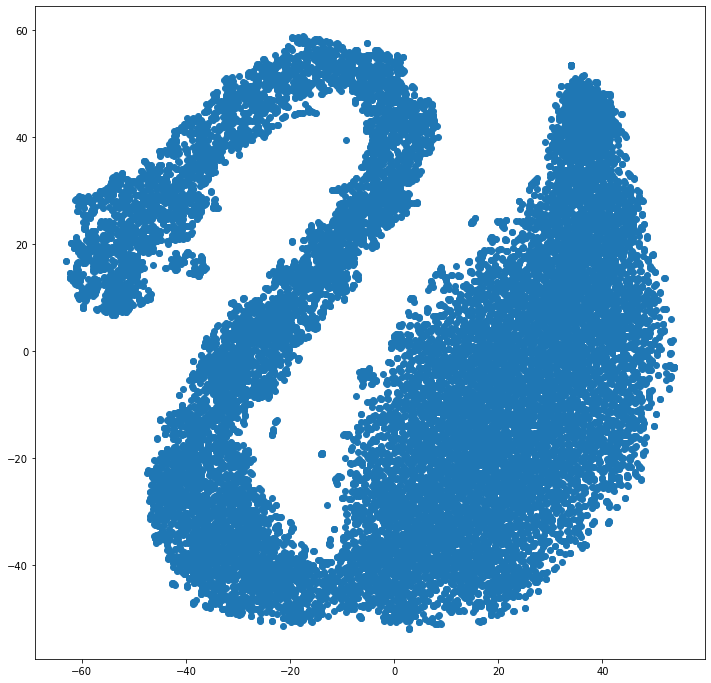

In [19]:
# Making the plot
plt.figure(figsize=(12, 12))
plt.scatter(coordinates[:, 0], coordinates[:, 1])
plt.show()

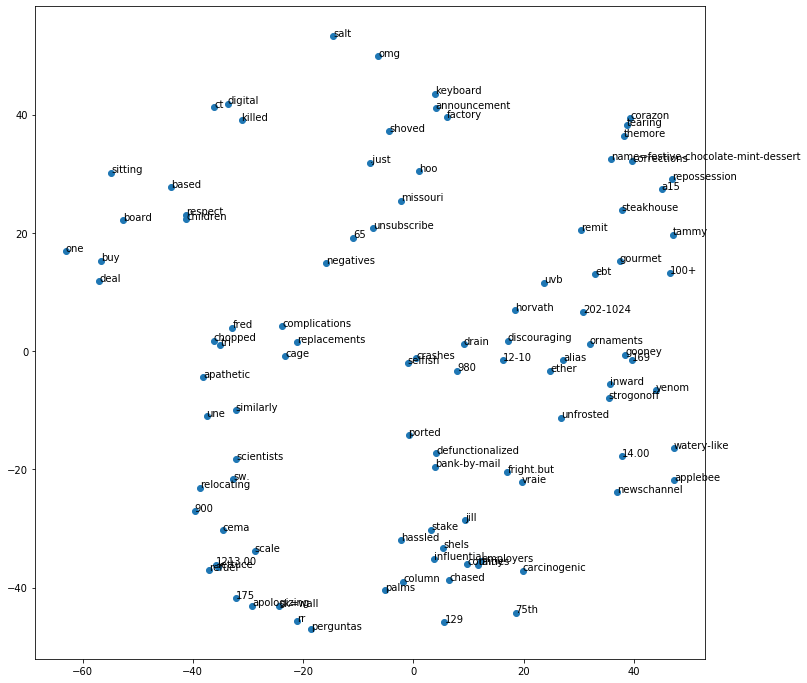

In [20]:
# It is very crowded because of the large number of words. Also, we want to add the words to the plot as labels
# Let's plot a random sample of 50 words
sample = np.random.randint(coordinates.shape[0], size = 100)
plt.figure(figsize=(12, 12))
plt.scatter(coordinates[sample, 0], coordinates[sample, 1])

# add lables
words = list(model.wv.index_to_key)
for i in sample:
    plt.annotate(words[i], xy=(coordinates[i, 0], coordinates[i, 1]))
    
plt.show()

# Additional Resources <a name="resource"></a>

- Original research paper on word embeddings: [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf);
- Blog post with additional technical details and extensions of word embeddings: [Learning Word Embedding](https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html);
- A nice blog post about self-supervised learning: [Self-Supervised Representation Learning](https://lilianweng.github.io/lil-log/2019/11/10/self-supervised-learning.html).